# &emsp; Case 1
Jukka Holopainen, Merja Leisti, Matti Närhi <br>
Modified last 2.2.2020  <br>
Helsinki Metropolia University of Applied Sciences<br><br>
Background<br>
In this document we try to create and train a dense neural network to predict to classify the presence of heart disease. The predict will be made by 13 varying attribute values. The main objective is to find the simplest, fastest and smallest possible model and settings that solves the predicting problem most accurately.<br><br> 
Introduction <br>
The data is collected from the Cleveland Clinic Foundation. The creators of the data are: V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. The donor of this project is David W. Aha. The data creating date is July, 1988.<br>
This data file has been "processed" – which means that instead of containing 76 attributes it only contains 13 attributes. These thirteen are: age, sex, chestpain, resting blood pressure, cholestrol, fasting blood suger, resting electrocardiograph, maximum heart rate, exercise induced angina, ST depression induced by exercise, the slope of the peak exercise ST segment,  number of major vessels and the defect type. All attributes are numeric-valued.<br>
The names and social security numbers of the patients have been removed from the database, and replaced with dummy values. Number of Instances in this data is 303. The instance mean age of this material is 54 years. 68% of the patients are male, 32% are female.<br><br>
In the following we will describe the steps of creating the neural network required, starting with downloading the required libraries.

In [1]:
%pylab inline
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


We download the data. At this point and just in case we also download three additional databases concerning heart disease diagnosis: Hungarian data, Long Beach -va data and Switzerland data:

In [2]:
url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/'
cleveData = url + r'cleveland.data'
hungarianData = url + r'hungarian.data'
switchData = url + r'switzerland.data'
cleanCleveData = url + r'processed.cleveland.data'

print(cleveData +'\n' +  hungarianData + '\n' + switchData + '\n' + cleanCleveData)

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


<h1>Data Description</h1>
Data had diveded fourteen differend attributes and there were:
1. age range 29-77 years and mean is 55,4 years
2. sex was boolean atrribute where 1=male and 0=female
3. cp = chestpain type values 1 to 4 where:<br>
    -- Value 1: typical angina<br>
    -- Value 2: atypical angina<br>
    -- Value 3: non-anginal pain<br>
    -- Value 4: asymptomatic<br>
4. trestbds = resting blood pressure in mm Hg range 94 - 200 and mean was 131,6
5. chol = serum cholestrorol in mg/dl range 126-564 and mean was 246
6. fbs = fasting blood suger grater than 120 mg/dl. Gets 1 if true, else it gets 0.
7. restecg = resting electrocardiographic result values 0,1,2 where: <br>
    -- Value 0: normal<br>
    -- Value 1: having ST-T wawe abnormality where T wave inversions and/or ST elevation or depression of > 0.05 mV<br>
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8. thalach = maximum heart rate achieved range 71 - 202 where mean was 149,6.
9. exang = exercise induced angina where 1 is true and 0 is false
10. oldpeak = ST depression induced by exercise relative to rest range 0-6,2 where mean was 1,04
11. slope = the slope of the peak exercise ST segment values 1 to 3 where:<br>
    -- Value 1: upsloping<br>
    -- Value 2: flat<br>
    -- Value 3: downsloping<br>
12. ca = number of major vessels colored by flourosopy range 0-3 where mean is 0,67
13. thal = Thalassemia which is an inherited blood disorder that affects the body's ability to produce hemoglobin and red blood cells. It has three differends values 3,6,7 where:<br>
    -- Value 3 = normal<br>
    -- Value 6 = fixed defect<br>
    -- value 7 = reversable defect<br>
14. num = diagnos of heart disease in angiographic status where: <br>
    -- Value 0 = less than 50% diameter narowing
    -- Value 1 = greater than 50% diameter narowing

We give the name, 'dfCC', to our file. And design the data table by giving the right headings for the columns and by preventing the table to put the first row as a heading. And start preprocessing by replacing the missing values by question mark.

In [3]:
dfCC = pd.read_csv(cleanCleveData, index_col = None, header = None, na_values = '?')
#do change column names
#dfCC = dfCC.rename(columns={0: "age", 1: "sex", 2: "cp", 3: "trestbds", 4: "chol", 
 #                           5: "fbs", 6: "restecg", 7: "thalach", 8: "exang", 9: "oldpeak", 
  #                          10: "slope", 11: "ca", 12: "thal", 13: "num"})

In [4]:
dfCC.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


We keep on preprocessing and use interpolate method for missing data points. This method performs a linear interpolation at missing data points:

In [5]:
dfCC = dfCC.interpolate()
dfCC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<h1>Data manipulation</h1>
<p> We still keep on preprocessing. We rescale the numeric data values in order to get equivalent magnitude for all the parametres. We use method standardization, which rescales data to be close to having distance for maximum and minimum a 1 and when there was outliner we made them so that their mean is close 0 with standard deviation of 1. For standardization we use a method scaling features to lie between a given minimum and maximum value, so called MinMaxScaler. For potential outliers we use robustscaler. Columns which we used MinMaxScaler method were age, cp, restecg, thalach, slope, ca, thal and num so that their value range is 0-1. And trstbps, chol and oldpeak were changed using RobustScaler method. Because their data values had clearly few outliners, which thanks to robustscaler most data values is between -0,5 and 0,5. And we left sex, fbs and exang columns as they were, because they had already data values between 0 to 1. </p>


In [6]:
minmax_scaler = preprocessing.MinMaxScaler()
dfCC[[0, 7]] = minmax_scaler.fit_transform(dfCC[[0, 7]])
dfCC[[2, 6,10,11,12,13]] = minmax_scaler.fit_transform(dfCC[[2, 6,10,11,12,13]])

robustscaler = preprocessing.RobustScaler()
dfCC[[3,4,9]] = robustscaler.fit_transform(dfCC[[3,4,9]])
dfCC.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.719472,0.084488,0.088954,0.148515,0.495050,0.600055,0.326733,0.149752,0.300330,0.227173,0.433168,0.234323
std,0.188305,0.467299,0.320042,0.879987,0.809014,0.356198,0.497486,0.174618,0.469794,0.725672,0.308113,0.313726,0.484304,0.307134
min,0.000000,0.000000,0.000000,-1.800000,-1.796875,0.000000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,-0.500000,-0.468750,0.000000,0.000000,0.477099,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.000000,0.000000,0.000000,0.500000,0.625954,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,0.500000,0.531250,0.000000,1.000000,0.725191,1.000000,0.500000,0.500000,0.333333,1.000000,0.500000
max,1.000000,1.000000,1.000000,3.500000,5.046875,1.000000,1.000000,1.000000,1.000000,3.375000,1.000000,1.000000,1.000000,1.000000


<h1>Testing neuralnetworks</h1>
Then we distribute our data to two segments: training set and testing set. We put the split point at 80%. And give the name, 'data' to our training set and the name, 'testData' to our test set.<br><br>
Then we build the first version of our neural network, giving it three layers: two hidden layers and the output. The hidden layers have 39 neurons and 16 neurons and the activation function in both is relu. The outputlayer has one output. <br>We use optimizer 'rmsprop', our loss function is 'mse'(mean squared error), and we examine the result by considering the mean average error. We take batches of size 26 rows, execute 50 epochs and use 20% of training data for validation.<br><br>
In all of the model tests, L1, L2 and Dropout regularizers were also tested. This was done to prevent overfitting of the model and to make the model more accurate. The regularizer that gives the best results will be chosen for each model. All the models will be first tested without regularization.

In [7]:
msk = np.random.rand(len(dfCC)) < 0.8
train = dfCC[msk] 
test = dfCC[~msk]
print(str(len(train)) +'\n'+ str(len(test)))
data = train.loc[:, 0:12]
labels = 1.0*(train.loc[:, 13] > 0)

testData = test.loc[:, 0:12]
testLabels = 1.0*(test.loc[:, 13] > 0)

#making neuralnetwork 
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16,kernel_regularizer = regularizers.l2(0.05), activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])

history = model.fit(data, labels, epochs=50, batch_size=26, verbose=0, validation_split = 0.2) 





236
67


We then scan what the algorithm has produced by the terms we gave it. We print two graphs: one for both the validation data and the training data loss function in 50 epochs, and another for the two data mean average errors in 50 epochs.

67/67 [==============================] - 0s 193us/sample - loss: 0.1333 - mean_absolute_error: 0.2715


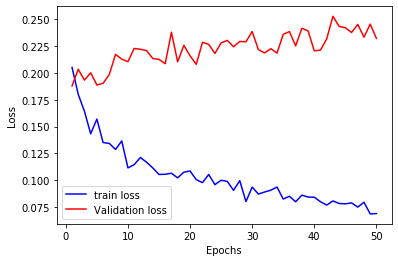

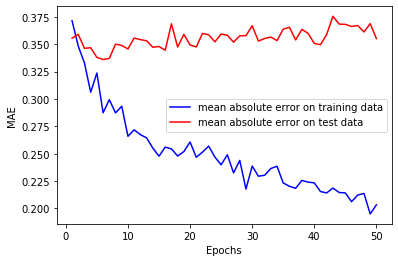

In [8]:
#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

time = range(1,len(loss)+1)

test_loss, test_acc = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="train loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")

plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on test data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

We notice that validation data values in loss and mean average error are desirable until about 7-10 epochs. After that the results deteriorate. We build our second model only by changing the epoch number from 50 to 7.

In [9]:
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16,kernel_regularizer = regularizers.l2(0.05), activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=7, batch_size=26, verbose=0, validation_split = 0.2)



67/67 [==============================] - 0s 200us/sample - loss: 0.1232 - mean_absolute_error: 0.2947


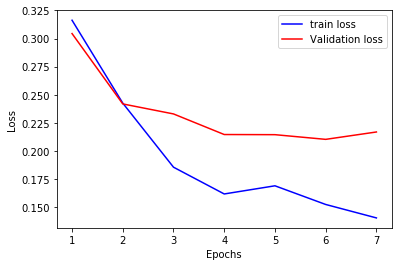

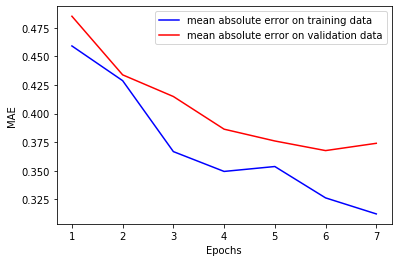

In [10]:
#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="train loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

Now validation loss values and mean average error values follow the training data values beautifully. But what about, if we execute a few more epochs? We try epoch number 9.

67/67 [==============================] - 0s 139us/sample - loss: 0.1700 - mean_absolute_error: 0.3261


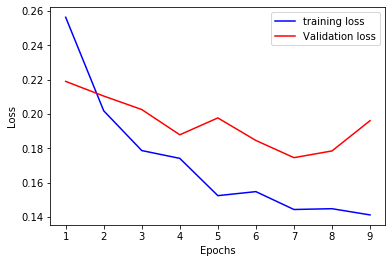

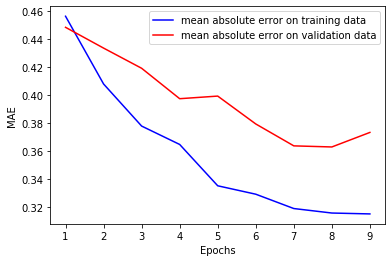

In [11]:
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16,kernel_regularizer = regularizers.l2(0.05), activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=9, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

Uh-oh, the validation data values are no more desirable: 9 epochs was too many. We try 8.

67/67 [==============================] - 0s 74us/sample - loss: 0.1516 - mean_absolute_error: 0.2977


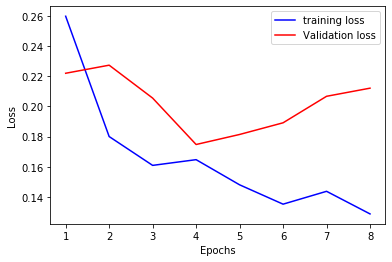

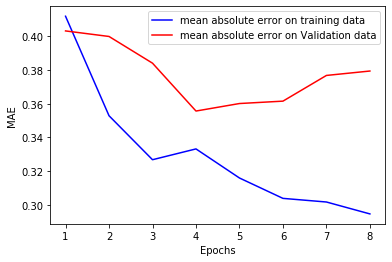

In [12]:
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16,kernel_regularizer = regularizers.l2(0.05), activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on Validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

Pretty satisfying. But the values could be better. We keep the epoch number 8 and now try something else. We build a new model by reducing one layer.

67/67 [==============================] - 0s 274us/sample - loss: 0.2091 - mean_absolute_error: 0.3568


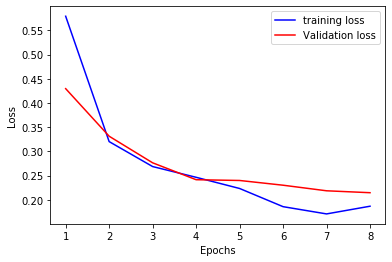

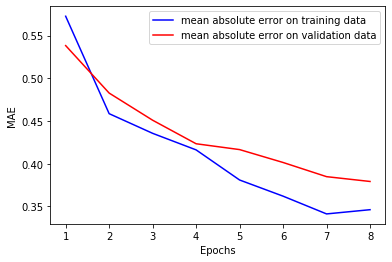

In [13]:
#testing taking one layer off
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()#

The loss value is about the same, the mean average error icreased. Something must be done. We try by fewer neurons: we drop the neuron number from 39 to 29.

67/67 [==============================] - 0s 167us/sample - loss: 0.1527 - mean_absolute_error: 0.3090


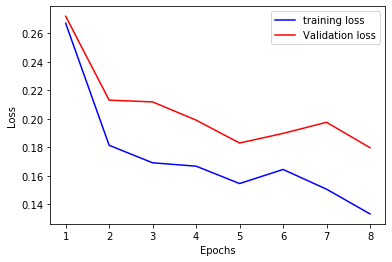

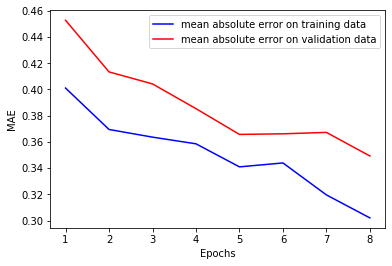

In [14]:
#model.add(Dense(29, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(29, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(29, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(29, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

The mean absolute error just raises. Loss goes smaller, good. But we return the neuron number now to 39. And what could be the result, if we now execute more epochs?

67/67 [==============================] - 0s 126us/sample - loss: 0.1284 - mean_absolute_error: 0.2533


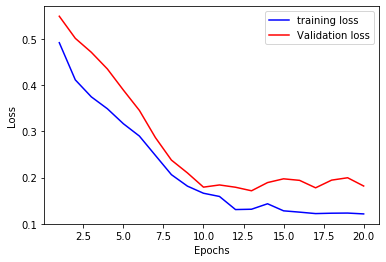

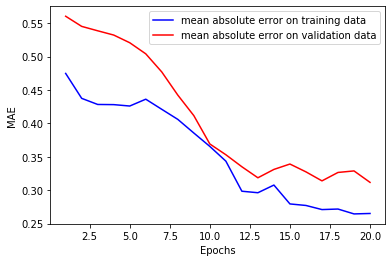

In [15]:
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

The best result so far. But graphs indicate that fewer epochs could give better results. We decrease the epoch number to 8 AND half the batch number from 26 to 13.

67/67 [==============================] - 0s 135us/sample - loss: 0.1267 - mean_absolute_error: 0.2473


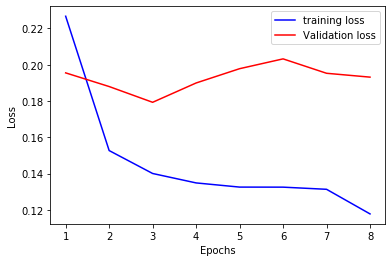

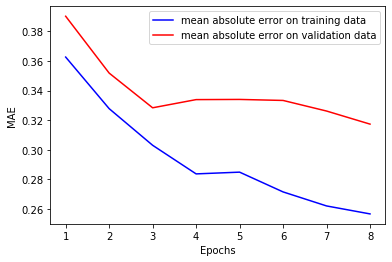

In [16]:
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=13, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

Slightly better results. Let's try batch number 20.

67/67 [==============================] - 0s 121us/sample - loss: 0.1218 - mean_absolute_error: 0.2533


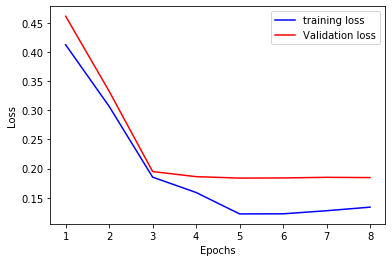

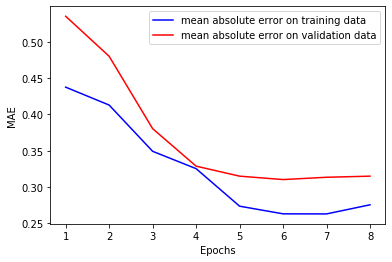

In [17]:
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

It looks like the curves are still falling. We need more epochs to see, are they really falling. Epoch number now 20.

67/67 [==============================] - 0s 60us/sample - loss: 0.1288 - mean_absolute_error: 0.2414


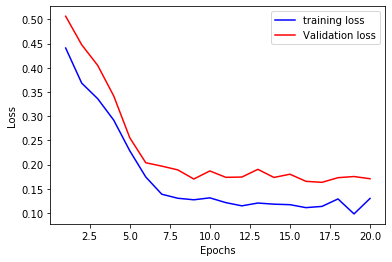

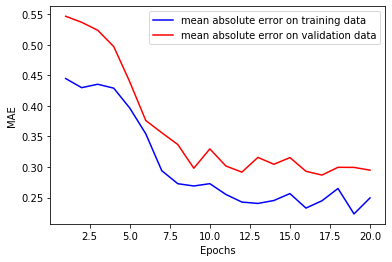

In [18]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

The mean absolute error has been smaller, 0,2251. It is now 0,2350. We try something totally different. Three layers, neuron numbers 20 and 15. 20 epochs and batch size 20.

67/67 [==============================] - 0s 113us/sample - loss: 0.1322 - mean_absolute_error: 0.2569


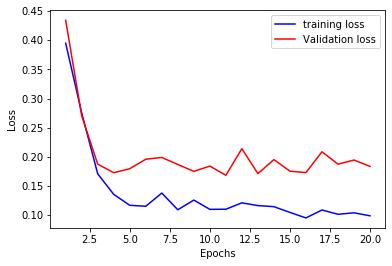

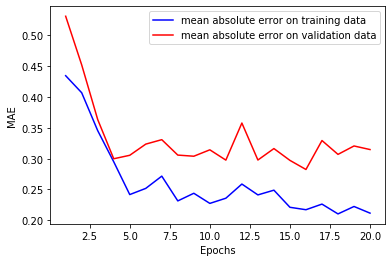

In [19]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(15, activation='relu', input_shape=(data.shape[1],)))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

But we found that it still gives worse results. But what if we try modifying second layer. Because it could give us better result.

67/67 [==============================] - 0s 130us/sample - loss: 0.1485 - mean_absolute_error: 0.2612


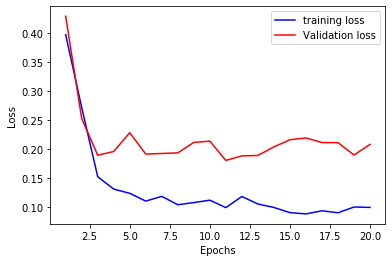

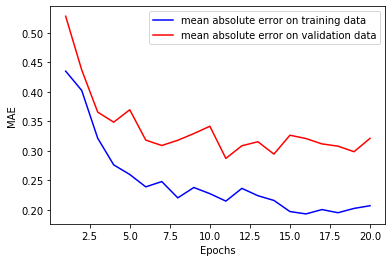

In [20]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15,activation = 'relu'))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(15, activation='relu', input_shape=(data.shape[1],)))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

Not bad. But it could be better. And we haven't tried all the options. We are now experimenting with more neurons: 20 and 30.

67/67 [==============================] - 0s 97us/sample - loss: 0.1462 - mean_absolute_error: 0.2649


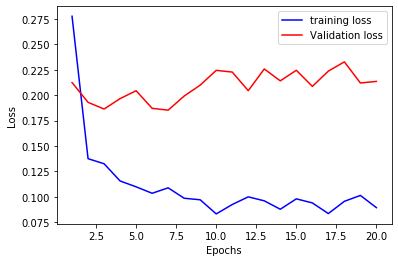

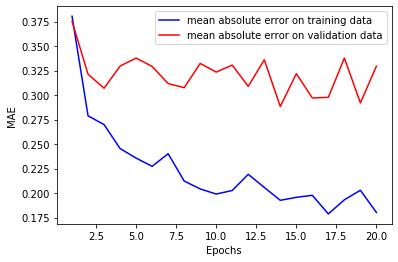

In [21]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(30,activation = 'relu'))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(30, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(30, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(30, activation='relu', input_shape=(data.shape[1],)))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

And we now clearly saw that error keeps increasing when we try using bigger layer. So now we try decrease it.

67/67 [==============================] - 0s 127us/sample - loss: 0.1292 - mean_absolute_error: 0.2244


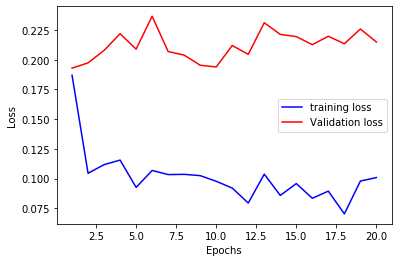

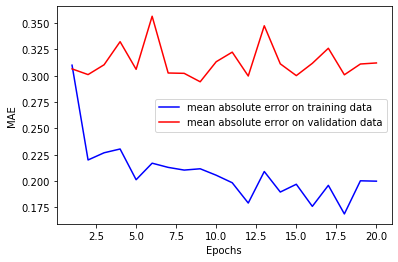

In [22]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10,activation = 'relu'))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(10, activation='relu', input_shape=(data.shape[1],)))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

It got better but it isn't what it was before so what if we increase first layer size.

67/67 [==============================] - 0s 300us/sample - loss: 0.1242 - mean_absolute_error: 0.2236


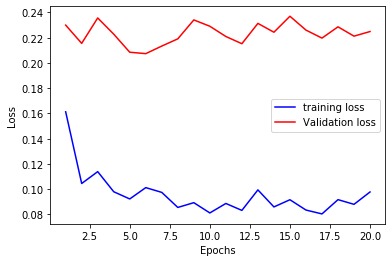

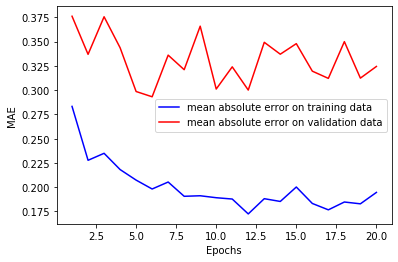

In [23]:
#model.add(Dense(25, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10,activation = 'relu'))

#model.add(Dense(25, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(25, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(25, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(10, activation='relu', input_shape=(data.shape[1],)))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

Now it start much worse than previous model but it ended rougly in same situation.<br>
And the best model which we got was this using only two layers and having large first layer.

67/67 [==============================] - 0s 154us/sample - loss: 0.1658 - mean_absolute_error: 0.3334


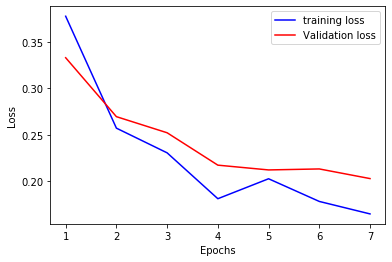

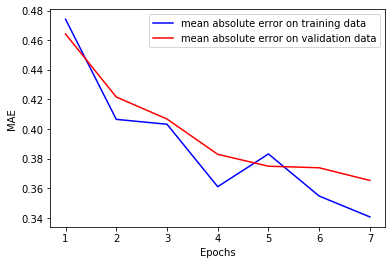

In [24]:
#best model after looking some time
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=7, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()#

# Summary

The simplest and the most accurate model was achieved by using only two layers in the network. This model has the best values for the loss and mean absolute error in both the training and the validation data. The first hidden layer has 39 neurons and after this layer there is the output layer. For building the model 7 epochs and a batch size of 26 are used. All in all, the number of layers, epochs and neurons had a clear effect on the result of the model. In addition, the best regularizer for all the models turned out to be Dropout with a value of 0.10. Even though for the final result the regularizer was also used it turned out that the model without regularization isn't significantly different than the regularized one.